In [12]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Body signal to smoking.csv")

df.head()

ID Sex  Age  Height_cms  Weight_kg  Waist_cms  eyesight_left  \
0   0   F   40         155         60       81.3            1.2   
1   1   F   40         160         60       81.0            0.8   
2   2   M   55         170         60       80.0            0.8   
3   3   M   40         165         70       88.0            1.5   
4   4   F   40         155         60       86.0            1.0   

   eyesight_right  hearing_left  hearing_right  ...  hemoglobin  \
0             1.0           1.0            1.0  ...        12.9   
1             0.6           1.0            1.0  ...        12.7   
2             0.8           1.0            1.0  ...        15.8   
3             1.5           1.0            1.0  ...        14.7   
4             1.0           1.0            1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y              0   
1            1.0               0.6  22.0  19.0  18.0     Y              0   
2            1.0               1.0  21.0  16.0  22.0     Y              0   
3            1.0               1.0  19.0  26.0  18.0     Y              0   
4            1.0               0.6  16.0  14.0  22.0     Y              0   

   tartar  smoking  
0       Y        0  
1       Y        0  
2       N        1  
3       Y        0  
4       N        0  

[5 rows x 27 columns]

In [13]:
df.shape

(55692, 27)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   Sex                  55692 non-null  object 
 2   Age                  55692 non-null  int64  
 3   Height_cms           55692 non-null  int64  
 4   Weight_kg            55692 non-null  int64  
 5   Waist_cms            55692 non-null  float64
 6   eyesight_left        55692 non-null  float64
 7   eyesight_right       55692 non-null  float64
 8   hearing_left         55692 non-null  float64
 9   hearing_right        55692 non-null  float64
 10  Systolic_BP          55692 non-null  float64
 11  Diastolic_BP         55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [15]:
df.describe().T.style.background_gradient(cmap = "PiYG")

In [16]:
df.nunique().sort_values()

oral                       1
smoking                    2
Sex                        2
dental caries              2
hearing_left               2
hearing_right              2
tartar                     2
Urine protein              6
Height_cms                13
Age                       14
eyesight_right            17
eyesight_left             19
Weight_kg                 22
serum creatinine          38
Diastolic_BP              95
HDL                      126
Systolic_BP              130
hemoglobin               145
AST                      219
ALT                      245
fasting blood sugar      276
Cholesterol              286
LDL                      289
triglyceride             390
Gtp                      488
Waist_cms                566
ID                     55692
dtype: int64

In [17]:
df.isnull().sum().sum()

0

In [18]:
df.corr().style.background_gradient(cmap = "coolwarm_r")

<AxesSubplot:>

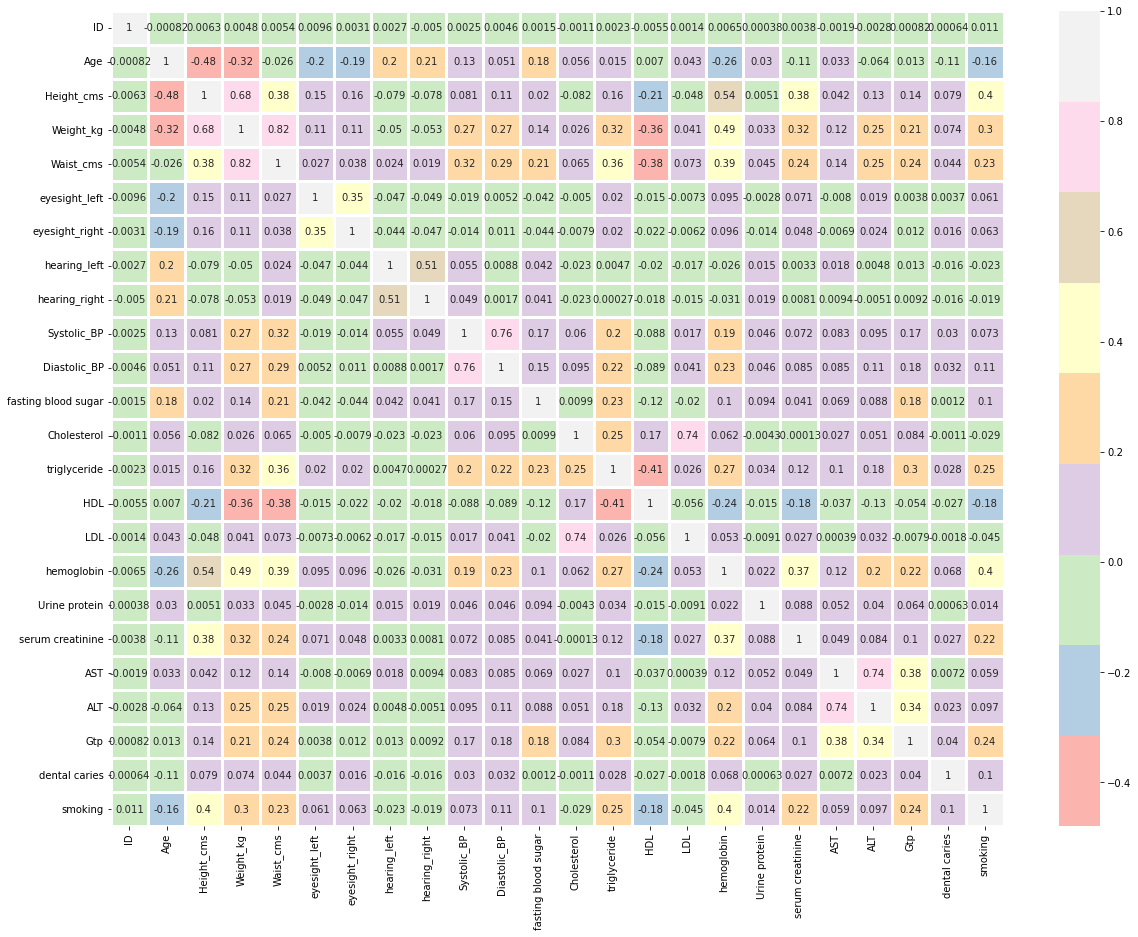

In [19]:
plt.figure(figsize = [20, 15], clear = True, facecolor = "white")
sns.heatmap(df.corr(), annot = True, square = False, linewidths = 3,
            linecolor = "white", cmap = "Pastel1")

<AxesSubplot:ylabel='smoking'>

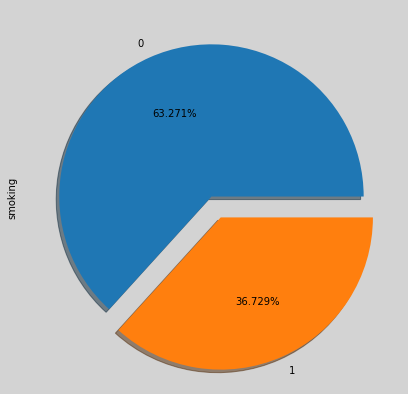

In [20]:
plt.figure(figsize = [7, 7], clear = True, facecolor = "lightgray")
df["smoking"].value_counts().plot.pie(explode = [0, 0.15], autopct= '%1.3f%%', shadow = True)

<AxesSubplot:ylabel='Sex'>

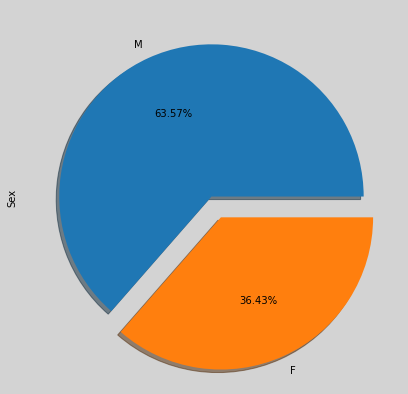

In [21]:
plt.figure(figsize = [7, 7], clear = True, facecolor = "lightgray")
df["Sex"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.2f%%', shadow = True)

[Text(0.5, 1.0, 'Classification of smoking/non-smoking')]

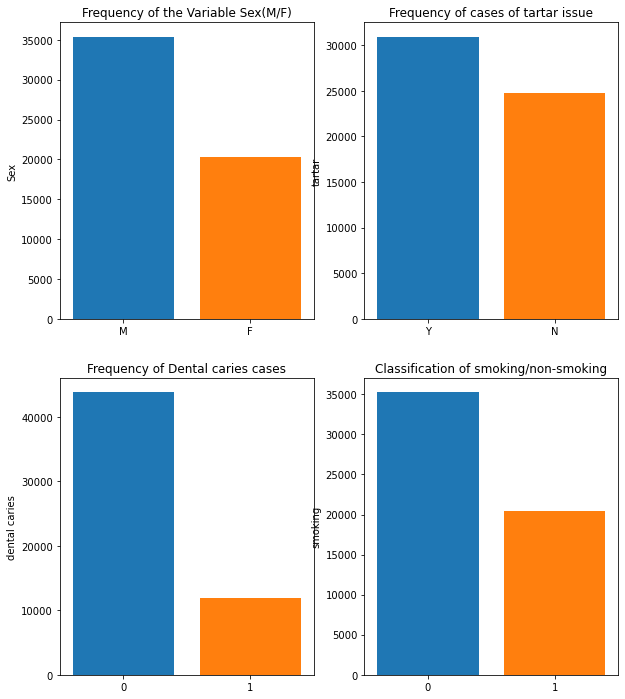

In [22]:
fig, axes = plt.subplots(2, 2, figsize = (10, 12))
axes = axes.flatten()

sns.barplot(ax = axes[0],
            x = df["Sex"].value_counts().index,
            y = df["Sex"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of the Variable Sex(M/F)");

sns.barplot(ax = axes[1],
            x = df["tartar"].value_counts().index,
            y = df["tartar"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of cases of tartar issue");

sns.barplot(ax = axes[2],
            x = df["dental caries"].value_counts().index,
            y = df["dental caries"].value_counts(),
            data = df, saturation = 1).set(title = "Frequency of Dental caries cases");

sns.barplot(ax = axes[3],
            x = df["smoking"].value_counts().index,
            y = df["smoking"].value_counts(),
            data = df, saturation = 1).set(title = "Classification of smoking/non-smoking")

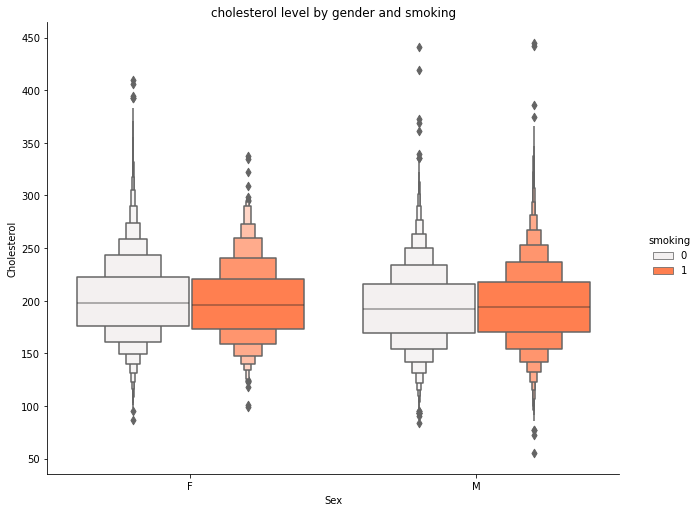

In [23]:
sns.catplot(x = "Sex",
            y = "Cholesterol",
            kind = "boxen",
            hue = "smoking",
            color = 'Coral',
            data = df, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True).set(title = "cholesterol level by gender and smoking")

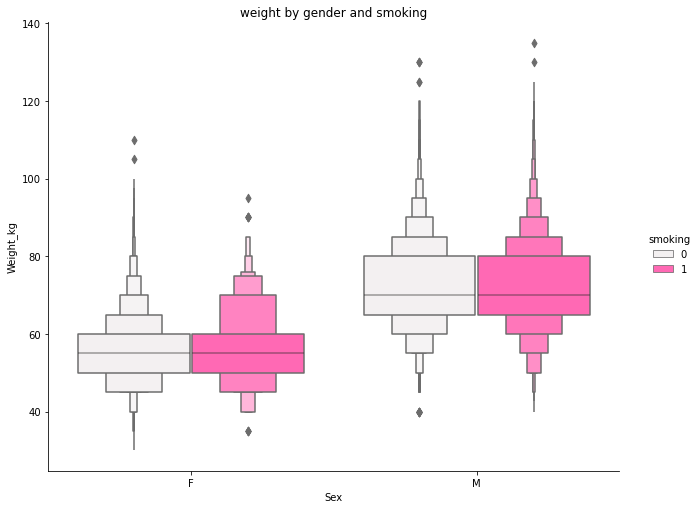

In [24]:
sns.catplot(x = "Sex",
            y = "Weight_kg",
            hue = "smoking",
            kind = "boxen",
            color = 'HotPink',
            data = df, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True).set(title = "weight by gender and smoking")

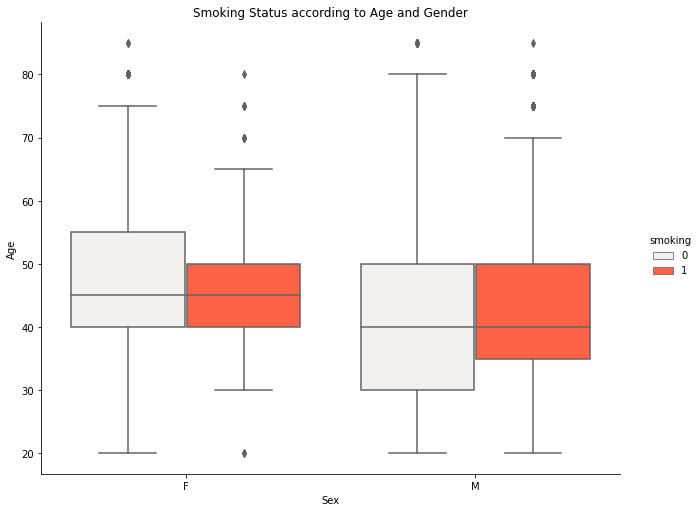

In [25]:
sns.catplot(x = "Sex",
            y = "Age",
            hue = "smoking",
            kind = "box",
            color = 'Tomato',
            data = df, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True).set(title = "Smoking Status according to Age and Gender")

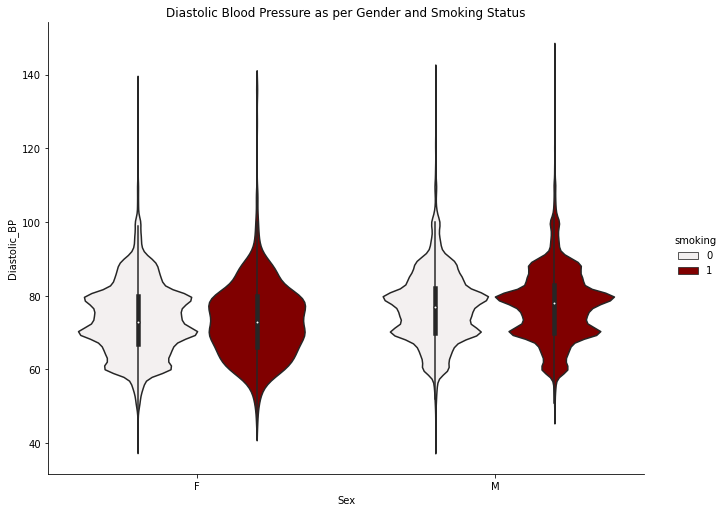

In [26]:
sns.catplot(x = "Sex",
            y = "Diastolic_BP",
            hue = "smoking",
            kind = "violin",
            color = 'Maroon',
            data = df, saturation = 1, height = 7, aspect = 1.35,
            margin_titles = True).set(title = "Diastolic Blood Pressure as per Gender and Smoking Status");

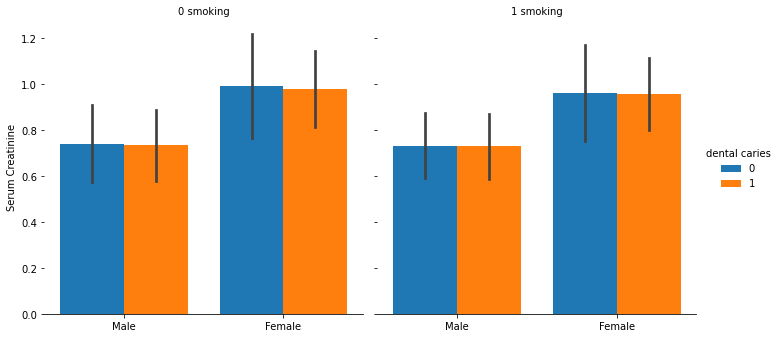

In [27]:
g = sns.catplot(x = "Sex", y = "serum creatinine", col = "smoking", 
                hue = "dental caries",
                data = df,
                saturation = 1,
                kind = "bar",
                ci = "sd",
                aspect = 0.99)

(g.set_axis_labels("", "Serum Creatinine").set_xticklabels(["Male", "Female"])
  .set_titles("{col_name} {col_var}").despine(left = True))

[Text(0.5, 1.0, 'Relationship between Weight and fasting blood sugar')]

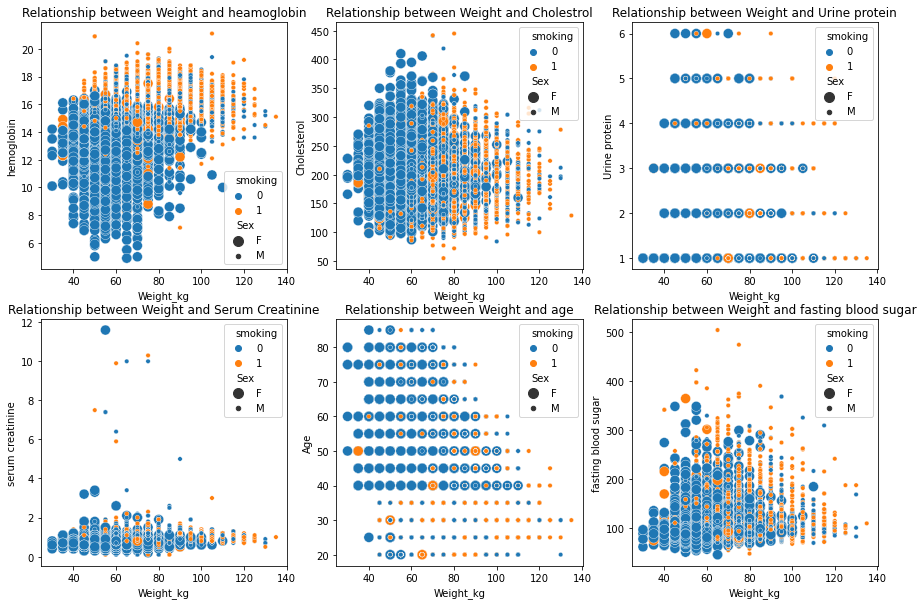

In [28]:
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "Weight_kg", y = "hemoglobin",
                hue = "smoking", size = "Sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between Weight and heamoglobin");

sns.scatterplot(ax = axes[1], x = "Weight_kg", y = "Cholesterol", hue = "smoking",
                size = "Sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between Weight and Cholestrol");

sns.scatterplot(ax = axes[2], x = "Weight_kg", y = "Urine protein", hue = "smoking",
                size = "Sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between Weight and Urine protein");

sns.scatterplot(ax = axes[3], x = "Weight_kg", y = "serum creatinine", hue = "smoking",
                size = "Sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between Weight and Serum Creatinine");

sns.scatterplot(ax = axes[4], x = "Weight_kg", y = "Age", hue = "smoking",
                size = "Sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between Weight and age");

sns.scatterplot(ax = axes[5], x = "Weight_kg", y = "fasting blood sugar", hue = "smoking",
                size = "Sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between Weight and fasting blood sugar")

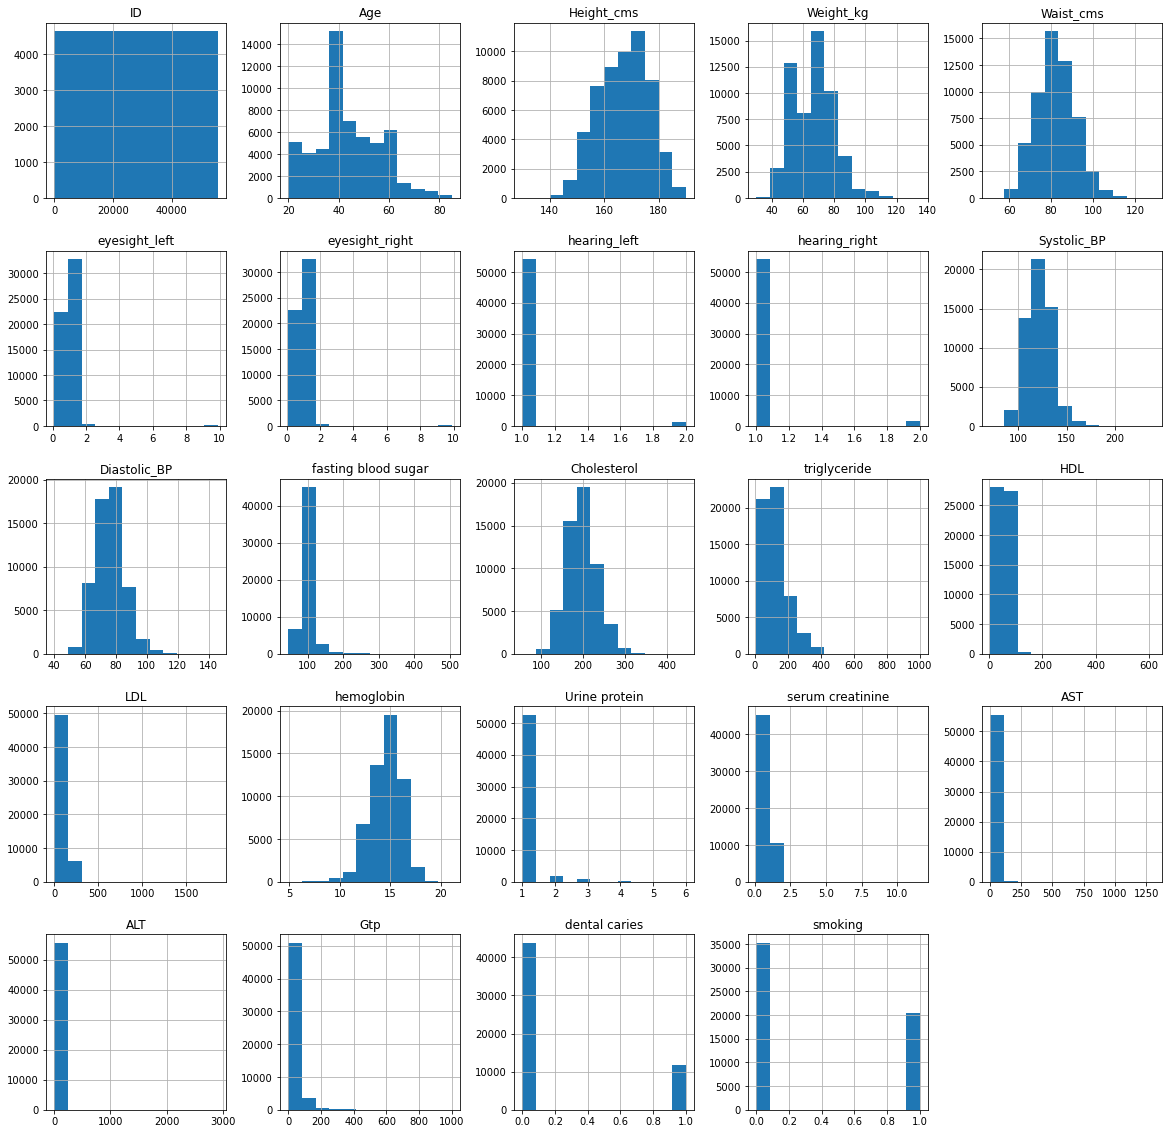

In [29]:
df.hist(figsize = (20, 20), bins = 12, legend = False);


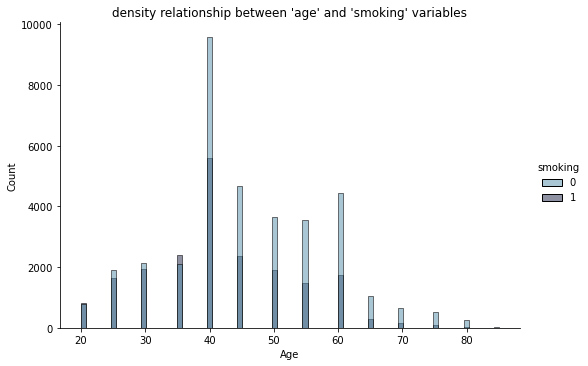

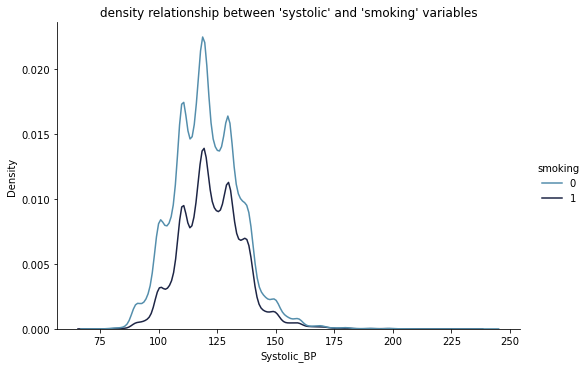

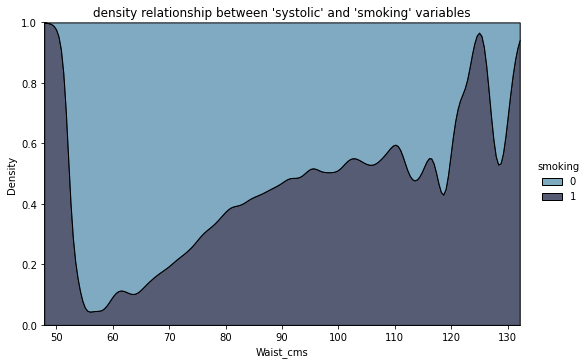

In [30]:
sns.displot(
    data = df, x = "Age", hue = "smoking",
    kind = "hist", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title =  "density relationship between 'age' and 'smoking' variables");


sns.displot(
    data = df, x = "Systolic_BP", hue = "smoking",
    kind = "kde", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'systolic' and 'smoking' variables");


sns.displot(
    data = df, x = "Waist_cms", hue = "smoking",
    kind = "kde", height = 5, aspect = 1.5, multiple="fill",
    palette="ch:rot=-.25,hue=1,light=.50").set(title = "density relationship between 'systolic' and 'smoking' variables")

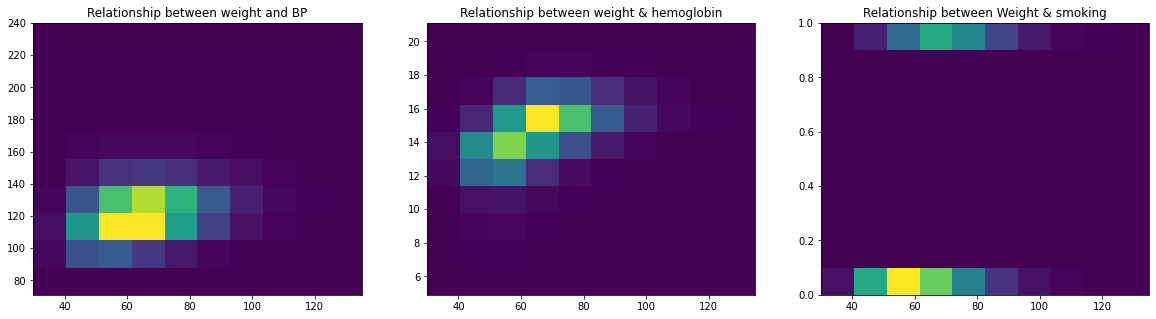

In [31]:
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].hist2d(df["Weight_kg"], df["Systolic_BP"])
ax[0].set_title("Relationship between weight and BP")

ax[1].hist2d(df["Weight_kg"], df["hemoglobin"])
ax[1].set_title("Relationship between weight & hemoglobin")

ax[2].hist2d(df["Weight_kg"], df["smoking"])
ax[2].set_title("Relationship between Weight & smoking")

plt.show()

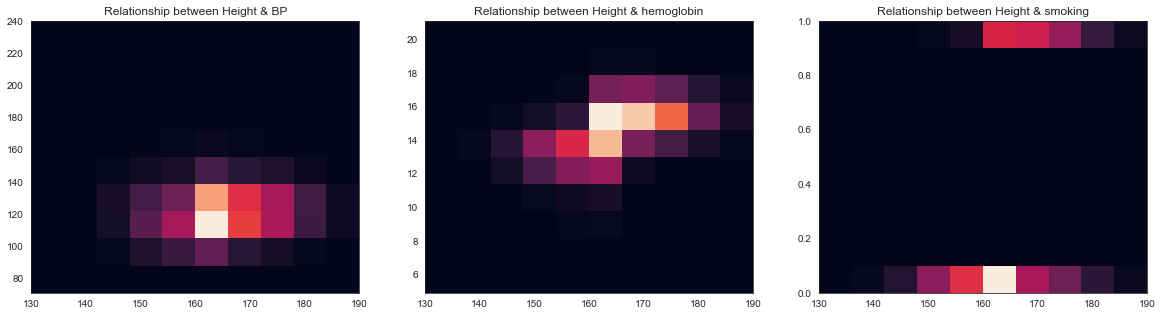

In [32]:
sns.set_style("white")

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0].hist2d(df["Height_cms"], df["Systolic_BP"])
ax[0].set_title("Relationship between Height & BP")

ax[1].hist2d(df["Height_cms"], df["hemoglobin"])
ax[1].set_title("Relationship between Height & hemoglobin")

ax[2].hist2d(df["Height_cms"], df["smoking"])
ax[2].set_title("Relationship between Height & smoking")
             
plt.show()

/Users/azeeskhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1667: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



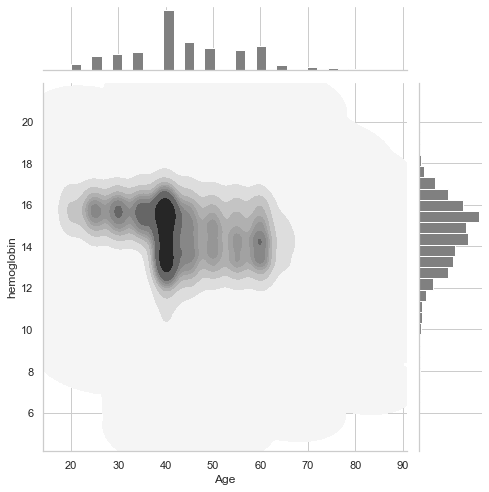

In [33]:
sns.set_theme(style = "whitegrid")

g = sns.JointGrid(data = df,
                  size = 7,
                  height = 5,
                  x = "Age",
                  y = "hemoglobin",
                  space = 0.2)

g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "binary")
g.plot_marginals(sns.histplot, color = "#808080", alpha = 1, bins = 30)

/Users/azeeskhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1667: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



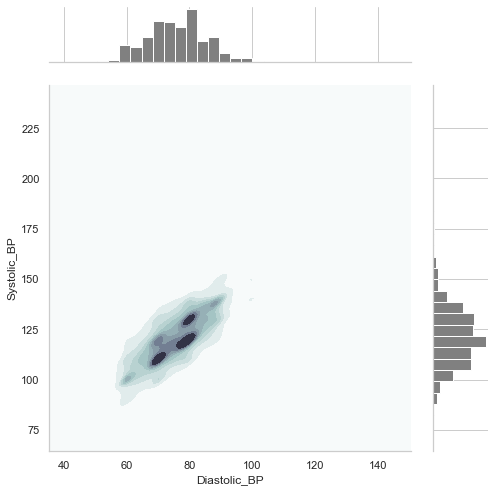

In [34]:
g = sns.JointGrid(data = df,
                  size = 7,
                  height = 5,
                  x = "Diastolic_BP",
                  y = "Systolic_BP",
                  space = 0.4)

g.plot_joint(sns.kdeplot, fill = True, thresh = 0, cmap = "bone_r")
g.plot_marginals(sns.histplot, color = "#808080", alpha = 1, bins = 30)

/Users/azeeskhan/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1667: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



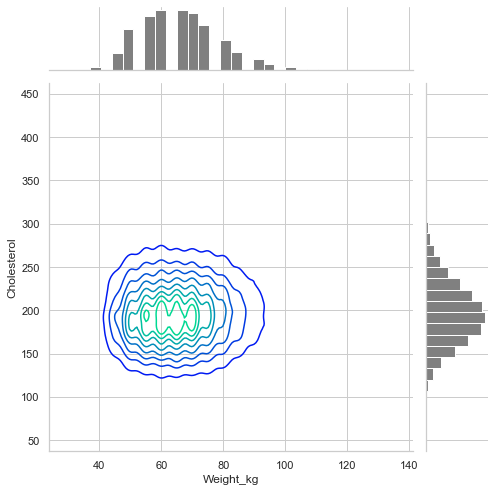

In [35]:
g = sns.JointGrid(data = df,
                  size = 7,
                  height = 5,
                  x = "Weight_kg",
                  y = "Cholesterol",
                  space = 0.2)

g.plot_joint(sns.kdeplot, fill = False, thresh = 0, cmap = "winter")
g.plot_marginals(sns.histplot, color = "#808080", alpha = 1, bins = 30)

In [36]:
fig = px.density_heatmap(df, x = "Age", y = "hemoglobin", z = "Cholesterol",
                        color_continuous_scale = "picnic", text_auto = True)
fig.show()

In [37]:
fig = px.scatter_3d(df, 
                    x = "hemoglobin",
                    y = "Age",
                    z = "Cholesterol",
                    color="smoking")
fig.show()

In [38]:
df.head(n = 10).style.background_gradient(cmap = "Oranges")


In [39]:
def outlier_detection(df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(df[(df[col] < Q1 - outlier_point)|(df[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train

will_drop_train = outlier_detection(df, 5, df.select_dtypes(["float", "int"]).columns)
will_drop_train[0:5]

[44, 3368, 3592, 4171, 4738]

In [40]:
df.drop(will_drop_train, inplace = True, axis = 0)

In [41]:
lbe = LabelEncoder()
lbe.fit_transform(df["Sex"])
df["Sex"] = lbe.fit_transform(df["Sex"])

In [42]:
lbe = LabelEncoder()
lbe.fit_transform(df["tartar"])
df["tartar"] = lbe.fit_transform(df["tartar"])

In [43]:
lbe = LabelEncoder()
lbe.fit_transform(df["oral"])
df["oral"] = lbe.fit_transform(df["oral"])

In [44]:
y = df["smoking"]

x = df.drop("smoking", axis = 1)

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn import set_config
set_config(print_changed_only = False)
pd.set_option('display.max_columns', 30)

import warnings
warnings.filterwarnings("ignore")

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.10,
                                                    shuffle = True,
                                                    random_state = 1)

/Users/azeeskhan/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [46]:

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [47]:


rf_model = RandomForestClassifier(n_estimators = 2000)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=2000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [48]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8393246187363834

Text(0, 0.5, 'Variables')

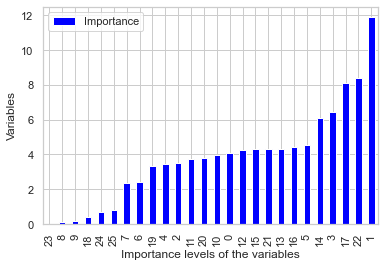

In [49]:
importance = pd.DataFrame({"Importance": rf_model.feature_importances_ * 100},
                         index = pd.DataFrame(x_train).columns)
importance.sort_values(by = "Importance", axis = 0,
                       ascending = True).plot(kind = "bar", color = "blue")
plt.xlabel("Importance levels of the variables")
plt.ylabel("Variables")

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3457
           1       0.78      0.80      0.79      2051

    accuracy                           0.84      5508
   macro avg       0.83      0.83      0.83      5508
weighted avg       0.84      0.84      0.84      5508



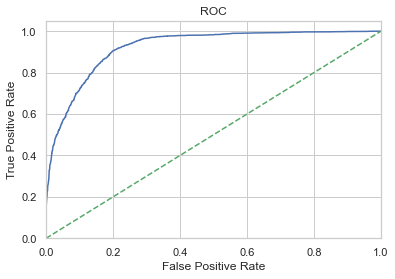

In [51]:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

[[2982  475]
 [ 410 1641]]


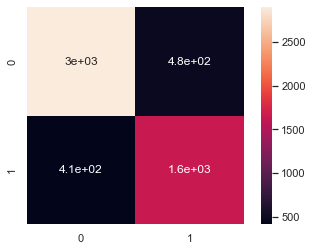

In [52]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

sns.heatmap(conf_mat, square = True, annot = True, robust = True)
plt.show()

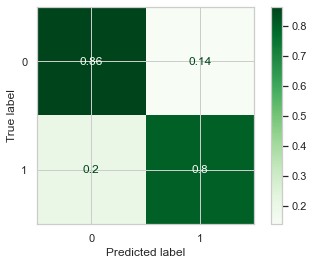

In [53]:
plot_confusion_matrix(rf_model, x_test, y_test, cmap = plt.cm.Greens, normalize = "true")

In [54]:
xgb_model = XGBClassifier(n_estimators = 1000)
xgb_model.fit(x_train, y_train)

[18:50:17] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [55]:
y_pred = xgb_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8213507625272332

In [56]:
from prettytable import PrettyTable

x = PrettyTable()
print('\n')
print("Comparison of XGBoost and Random Forest Results")
x.field_names = ["Model", "Accuracy"]

x.add_row(["XGBoost model", round(accuracy_score(y_test, xgb_model.predict(x_test)), 2)])
x.add_row(["Random Forest model", round(accuracy_score(y_test, rf_model.predict(x_test)), 3)])

print(x)
print('\n')



Comparison of XGBoost and Random Forest Results
+---------------------+----------+
|        Model        | Accuracy |
+---------------------+----------+
|    XGBoost model    |   0.82   |
| Random Forest model |  0.839   |
+---------------------+----------+


